In [1]:
%pwd

'C:\\Users\\llaur\\OneDrive\\Desktop\\research\\COLLECTED DATA'

# Deal or No Deal Research Project

Here's all the data processing and analysis for the data from our collected study. I built a Javascript online game of Deal or No Deal and collected data from participants in the study using a Python Flask API hosted on the Google Cloud Platform. That data is linked to Qualtrics responses via Game IDs, automatically generated by the game. The raw data file is called `raw_data.txt` and the qualtrics responses in the csv are anonymized.

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Data Processing

Import the data that was written by the backend API into the text file with each line being a new entry. Process each line and save it to a list of dictionaries.

In [2]:
list_of_dicts = []

with open('raw_data.txt', "r") as f_in:
    list_of_dicts = [json.loads(line.strip().replace("\'", "\"").replace("True", "\"True\"").replace("False", "\"False\"")) for line in f_in]
#     for line in f_in:
#         # Remove newline characters and replace single quotes with double quotes
#         line = line.strip()
#         line = line.replace("\'", "\"")
#         line = line.replace("True", "\"True\"") # javascript sent the boolean values to the Python API without quotation marks
#         line = line.replace("False", "\"False\"")
#         list_of_dicts.append(line)
        
# Print one of the dictionaries in the list
print(list_of_dicts[0])

{'1': [0.01, 1, 5, 25, 50, 75, 200, 400, 500, 1000, 5000, 10000, 50000, 100000, 200000, 300000, 400000, 500000, 750000, 1000000], '2': [0.01, 1, 5, 50, 75, 400, 500, 5000, 10000, 50000, 100000, 200000, 300000, 500000, 750000], '3': [0.01, 1, 5, 75, 500, 10000, 50000, 100000, 200000, 300000, 500000], '4': [1, 5, 75, 10000, 100000, 200000, 300000, 500000], '5': [1, 5, 75, 10000, 300000, 500000], '6': [1, 75, 10000, 300000, 500000], 'bo1': 38973, 'po1': 4500000, 'bo2': 46063, 'po2': 4000000, 'bo3': 53588, 'po3': 500000, 'bo4': 90778, 'po4': 85565375, 'bo5': 104761, 'po5': 400000, 'bo6': 136668, 'po6': 6000, 'result': 'D', 'end_round': 6, 'winnings': 6000, 'game_id': 'G96845'}


Turn it into a dataframe to work with it more easily.

In [3]:
df = pd.DataFrame(list_of_dicts)
data = pd.json_normalize(df.to_dict(orient='records'))
data.shape

(1587, 32)

Get an idea of all the columns we have

In [4]:
data.columns

Index(['1', '2', '3', '4', '5', '6', 'bo1', 'po1', 'bo2', 'po2', 'bo3', 'po3',
       'bo4', 'po4', 'bo5', 'po5', 'bo6', 'po6', 'result', 'end_round',
       'winnings', 'game_id', '7', '8', '9', 'bo7', 'po7', 'bo8', 'po8', 'bo9',
       'po9', 'first_game'],
      dtype='object')

Delete the entries that aren't linked to Qualtrics responses

First import the data from the study, which was exported from Qualtrics

In [5]:
qualtrics = pd.read_csv('Decision Making_December 15, 2023_11.44.csv')
qualtrics.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23,id
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"Imagine that we roll a fair, six-sided die 100...","In the BIG BUCKS LOTTERY, the chances of winni...","In the ACME PUBLISHING SWEEPSTAKES, the chance...","In a lake, there is a patch of lily pads. Ever...",If it takes five machines 5 minutes to make fi...,Suppose you have a close friend who has a lump...,Are you familiar with the game Deal or No Deal?,Enter your first game ID (G#####),Enter your second game ID (G#####),id
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID33_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID30_TEXT""}","{""ImportId"":""QID29_TEXT""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}","{""ImportId"":""id""}"
2,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,50,10,0.1,7,100,90,1,G23350,G21032,28236
3,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,500,10,0.10%,47,5 minutes,50%,1,G66335,G70539,25652
4,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,500,10,0.10%,24,100 min,90%,2,G50365,G64023,28150
5,11/13/2023 11:48,11/13/2023 11:59,0,207.151.52.65,100,683,1,11/13/2023 11:59,R_1N2D7lm6UfgU5j0,NaN,...,500,10,0.10%,47,5 min,50,1,G17286,G97468,30915
6,11/13/2023 12:39,11/13/2023 12:46,0,104.32.181.17,100,454,1,11/13/2023 12:46,R_246mV4u7mFX08gQ,NaN,...,500,10,0.1,47,5,18,1,G83382,G53605,29470
7,11/13/2023 13:43,11/13/2023 13:47,0,207.151.52.81,100,253,1,11/13/2023 13:47,R_1ffSiDx1nBT7Y2k,NaN,...,500,10,1,7,20,45,1,G71564,G35851,30416
8,11/13/2023 13:50,11/13/2023 14:01,0,66.253.194.21,100,629,1,11/13/2023 14:01,R_332dhjzUhK6EJe3,NaN,...,500,100,1%,24,100,50%,2,G62665,G70945,30472
9,11/13/2023 14:18,11/13/2023 14:26,0,207.151.52.85,100,452,1,11/13/2023 14:26,R_2hozf2hQNdiMc8x,NaN,...,666,10,0.01,47,5 min,10%,1,G45407,G84300,27237


In [6]:
qualtrics.shape

(208, 44)

Isolate the two columns that have the Game ID's that will be used to filter the data df

In [7]:
g1 = qualtrics['Q22.1']
g2 = qualtrics['Q23']

In [8]:
g1

0      Enter your first game ID (G#####)
1              {"ImportId":"QID25_TEXT"}
2                                 G23350
3                                 G66335
4                                 G50365
                     ...                
203                                  NaN
204                                  NaN
205                                  NaN
206                                  NaN
207                                  NaN
Name: Q22.1, Length: 208, dtype: object

Filter out rows in data whose game ID's don't match a response from a participant in the Qualtrics survey

In [9]:
data = data[data['game_id'].isin(g1) | data['game_id'].isin(g2)]
data.shape

(346, 32)

Delete the rows from qualtrics data that aren't real game numbers

In [10]:
data['game_id']

311     G10097
1023    G46769
1117    G23350
1118    G21032
1119    G66335
         ...  
1580    G88470
1583    G25431
1584    G34023
1585    G90148
1586    G20245
Name: game_id, Length: 346, dtype: object

### Number of filtered, valid solutions

In [11]:
qualtrics = qualtrics[qualtrics['Q22.1'].isin(data['game_id'])]
qualtrics.shape

(171, 44)

In [12]:
qualtrics = qualtrics[qualtrics['Q23'].isin(data['game_id'])]
qualtrics.shape

(163, 44)

That's the number of responses where both games they listed is actually in the data.txt file

In [13]:
# qualtrics.to_csv('played.csv')

## Merge with Qualtrics Responses

In [14]:
qualtrics.head(3)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q29,Q28,Q27,Q26,Q8,Q22,Q22.1,Q23,id
2,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,50,10,0.1,7,100,90,1,G23350,G21032,28236
3,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,500,10,0.10%,47,5 minutes,50%,1,G66335,G70539,25652
4,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,500,10,0.10%,24,100 min,90%,2,G50365,G64023,28150


Separate games based on whether they were played first or second. Merge accordingly

Filter second games played

In [15]:
data2 = data[data['first_game']=="False"]
data2.shape

(163, 32)

In [16]:
for colname in data2.columns:
    data2 = data2.rename(columns={colname: colname+"_g2"})
data2.head(1)

,1_g2,2_g2,3_g2,4_g2,5_g2,6_g2,bo1_g2,po1_g2,bo2_g2,po2_g2,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
311,"[0.01, 1, 5, 10, 25, 75, 100, 200, 300, 400, 5...","[0.01, 1, 5, 25, 100, 200, 300, 400, 750, 1000...","[0.01, 1, 5, 100, 200, 400, 750, 75000, 400000...","[0.01, 1, 5, 200, 400, 750, 400000, 750000]","[0.01, 1, 5, 200, 400, 400000]","[0.01, 1, 5, 200, 400]",32461,50000.0,65370.0,100000.0,...,"[0.01, 1, 200, 400]","[1, 200, 400]","[1, 200]",145.0,300.0,210.0,300.0,115.0,100.0,False


Merge so that the G2 ID matches the ID from data2

In [17]:
df2 = pd.merge(qualtrics, data2, left_on='Q23', right_on='game_id_g2')
df2.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g2,8_g2,9_g2,bo7_g2,po7_g2,bo8_g2,po8_g2,bo9_g2,po9_g2,first_game_g2
0,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,"[200, 5000, 75000, 200000]","[200, 5000, 75000]","[200, 5000]",64831.0,60000.0,27175.0,30000.0,2937.0,3000.0,False
2,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,11/13/2023 11:48,11/13/2023 11:59,0,207.151.52.65,100,683,1,11/13/2023 11:59,R_1N2D7lm6UfgU5j0,NaN,...,"[1, 5, 500, 1000000]","[1, 500, 1000000]","[1, 1000000]",228861.0,250000.0,331425.0,300000.0,539111.0,400000.0,False
4,11/13/2023 12:39,11/13/2023 12:46,0,104.32.181.17,100,454,1,11/13/2023 12:46,R_246mV4u7mFX08gQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [18]:
df2.shape

(154, 76)

Filter 1st games played

In [19]:
data1 = data[data['first_game']=="True"]
data1.shape

(183, 32)

In [20]:
for colname in data1.columns:
    data1 = data1.rename(columns={colname: colname+"_g1"})
data1.head(1)

,1_g1,2_g1,3_g1,4_g1,5_g1,6_g1,bo1_g1,po1_g1,bo2_g1,po2_g1,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
1117,"[0.01, 1, 5, 10, 25, 75, 100, 200, 300, 400, 5...",NaN,NaN,NaN,NaN,NaN,24962,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [21]:
df2.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Q24', 'Q1', 'Q2', 'Q3',
       'Q3_3_TEXT', 'Q4', 'Q5', 'Q10', 'Q12', 'Q11', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q32', 'Q31', 'Q30', 'Q29', 'Q28', 'Q27', 'Q26', 'Q8',
       'Q22', 'Q22.1', 'Q23', 'id', '1_g2', '2_g2', '3_g2', '4_g2', '5_g2',
       '6_g2', 'bo1_g2', 'po1_g2', 'bo2_g2', 'po2_g2', 'bo3_g2', 'po3_g2',
       'bo4_g2', 'po4_g2', 'bo5_g2', 'po5_g2', 'bo6_g2', 'po6_g2', 'result_g2',
       'end_round_g2', 'winnings_g2', 'game_id_g2', '7_g2', '8_g2', '9_g2',
       'bo7_g2', 'po7_g2', 'bo8_g2', 'po8_g2', 'bo9_g2', 'po9_g2',
       'first_game_g2'],
      dtype='object')

Filter 1st game played

In [22]:
df2[['Q22.1', 'Q23']].head()

,Q22.1,Q23
0,G23350,G21032
1,G66335,G70539
2,G50365,G64023
3,G17286,G97468
4,G83382,G53605


In [23]:
data1[['game_id_g1']].head()

,game_id_g1
1117,G23350
1119,G66335
1121,G17286
1122,G50365
1125,G83382


Merge so that the col from qualtrics asking for G1 ID matches ID's from data filtered for 1st game played

In [24]:
df = pd.merge(df2, data1, left_on='Q22.1', right_on='game_id_g1')
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1
0,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,11/13/2023 11:48,11/13/2023 11:59,0,207.151.52.65,100,683,1,11/13/2023 11:59,R_1N2D7lm6UfgU5j0,NaN,...,"[500, 5000, 10000, 750000]",NaN,NaN,175527.0,NaN,NaN,NaN,NaN,NaN,True
4,11/13/2023 12:39,11/13/2023 12:46,0,104.32.181.17,100,454,1,11/13/2023 12:46,R_246mV4u7mFX08gQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [25]:
df.shape

(154, 108)

Fix column names to avoid confusion

In [26]:
for col in df.columns:
    print(col, end=" ")

StartDate EndDate Status IPAddress Progress Duration (in seconds) Finished RecordedDate ResponseId RecipientLastName RecipientFirstName RecipientEmail ExternalReference LocationLatitude LocationLongitude DistributionChannel UserLanguage Q24 Q1 Q2 Q3 Q3_3_TEXT Q4 Q5 Q10 Q12 Q11 Q13 Q14 Q15 Q16 Q17 Q32 Q31 Q30 Q29 Q28 Q27 Q26 Q8 Q22 Q22.1 Q23 id 1_g2 2_g2 3_g2 4_g2 5_g2 6_g2 bo1_g2 po1_g2 bo2_g2 po2_g2 bo3_g2 po3_g2 bo4_g2 po4_g2 bo5_g2 po5_g2 bo6_g2 po6_g2 result_g2 end_round_g2 winnings_g2 game_id_g2 7_g2 8_g2 9_g2 bo7_g2 po7_g2 bo8_g2 po8_g2 bo9_g2 po9_g2 first_game_g2 1_g1 2_g1 3_g1 4_g1 5_g1 6_g1 bo1_g1 po1_g1 bo2_g1 po2_g1 bo3_g1 po3_g1 bo4_g1 po4_g1 bo5_g1 po5_g1 bo6_g1 po6_g1 result_g1 end_round_g1 winnings_g1 game_id_g1 7_g1 8_g1 9_g1 bo7_g1 po7_g1 bo8_g1 po8_g1 bo9_g1 po9_g1 first_game_g1 

In [27]:
df.drop(columns=['Q24', 'StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage','first_game_g1', 'first_game_g2'])

,IPAddress,Q1,Q2,Q3,Q3_3_TEXT,Q4,Q5,Q10,Q12,Q11,...,game_id_g1,7_g1,8_g1,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1
0,75.83.34.247,21,15,2,NaN,2,2,5,4,2,...,G23350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47.154.19.234,21,15,1,NaN,2,2,5,5,5,...,G66335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207.151.52.217,23,16,2,NaN,2,2,4,4,5,...,G50365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,207.151.52.65,20,14,1,NaN,2,1,5,5,4,...,G17286,"[500, 5000, 10000, 750000]",NaN,NaN,175527.0,NaN,NaN,NaN,NaN,NaN
4,104.32.181.17,21,15,1,NaN,1,NaN,4,4,6,...,G83382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,68.181.16.50,20,15,2,NaN,1,NaN,2,2,2,...,G37979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,172.116.1.95,22,15,1,NaN,2,1,5,5,4,...,G10632,"[1, 10, 750, 50000]","[1, 10, 50000]","[1, 10]",11925.0,NaN,17017.0,NaN,5.0,NaN
151,50.175.168.105,20,15,1,NaN,1,NaN,4,3,2,...,G85410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,68.181.16.12,20,15,2,NaN,1,NaN,4,5,6,...,G25431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate log10 of winnings

In [28]:
import math
def safe_log(x):
    if x > 0:
        return math.log10(x)
    else:
        return 0

df['winnings_g1_log10'] = df['winnings_g1'].apply(safe_log)
df['winnings_g2_log10'] = df['winnings_g2'].apply(safe_log)
data['winnings_log10'] = data['winnings'].apply(safe_log)

In [29]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,9_g1,bo7_g1,po7_g1,bo8_g1,po8_g1,bo9_g1,po9_g1,first_game_g1,winnings_g1_log10,winnings_g2_log10
0,11/12/2023 23:39,11/12/2023 23:46,0,75.83.34.247,100,421,1,11/12/2023 23:46,R_2feS88wmBtXIql3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,2.698970,4.343271
1,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4.407748,2.301030
2,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4.294466,1.000000
3,11/13/2023 11:48,11/13/2023 11:59,0,207.151.52.65,100,683,1,11/13/2023 11:59,R_1N2D7lm6UfgU5j0,NaN,...,NaN,175527.0,NaN,NaN,NaN,NaN,NaN,True,5.244344,0.000000
4,11/13/2023 12:39,11/13/2023 12:46,0,104.32.181.17,100,454,1,11/13/2023 12:46,R_246mV4u7mFX08gQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,4.912451,4.000000


In [30]:
df = df.drop_duplicates(subset='game_id_g1', keep=False)
df.shape

(152, 110)

In [31]:
df = df.drop_duplicates(subset='game_id_g2', keep=False)
df.shape

(152, 110)

# Exploratory Data Analysis

## Winnings

### Combined winnings
Concatenate winnings 1 and 2 into a single df of winnings

In [32]:
comb_winnings = pd.concat([df['winnings_g1'], df['winnings_g2']])
comb_winnings_log10 = pd.concat([df['winnings_g1_log10'], df['winnings_g2_log10']])

In [33]:
w = comb_winnings.describe()
wlog = comb_winnings_log10.describe()
wdescr = pd.concat([w, wlog], axis = 1)
wdescr.columns = ['winnings', 'winnings_log10']
print(wdescr)

             winnings  winnings_log10
count      304.000000      304.000000
mean     64095.588882        3.930135
std     138651.596983        1.342537
min          0.010000       -2.000000
25%       1500.000000        3.176091
50%      25567.000000        4.407680
75%      61653.500000        4.789804
max    1000000.000000        6.000000


Text(0.5, 1.0, 'log(winnings) counts')

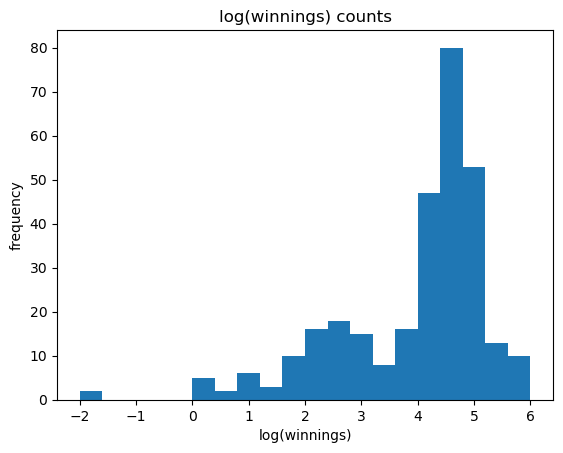

In [35]:
plt.hist(comb_winnings_log10, bins=20)
plt.xlabel("log(winnings)")
plt.ylabel("frequency")
plt.title('log(winnings) counts')

### Winnings by game ordering

In [35]:
df[['winnings_g1', 'winnings_g1_log10', 'end_round_g1', 'winnings_g2', 'winnings_g2_log10', 'end_round_g2']].describe()

,winnings_g1,winnings_g1_log10,end_round_g1,winnings_g2,winnings_g2_log10,end_round_g2
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,65551.671184,3.925529,4.164474,62639.506579,3.934742,4.375000
std,137118.767822,1.392392,3.270264,140605.898829,1.295357,3.409788
min,0.010000,-2.000000,1.000000,1.000000,0.000000,1.000000
25%,2140.500000,3.322878,1.000000,1000.000000,3.000000,1.000000
50%,25560.000000,4.407561,3.000000,26871.000000,4.429216,3.000000
75%,74622.750000,4.872869,7.000000,53841.000000,4.730210,7.250000
max,1000000.000000,6.000000,10.000000,1000000.000000,6.000000,10.000000


### Winnings by Game Mode

Filter for the ones in `df` that don't have po1 defined.

In [41]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer, game 2 was Player's Offer
b2data = df[df['po1_g2'].isnull()] # game 1 was Player's Offer, game 2 was Banker's Offer
comb_bwinnings = pd.concat([b1data['winnings_g1'], b2data['winnings_g2']]) # BO
comb_pwinnings = pd.concat([b2data['winnings_g1'], b1data['winnings_g2']]) # PO
comb_bwinnings_log10 = pd.concat([b1data['winnings_g1_log10'], b2data['winnings_g2_log10']])
comb_pwinnings_log10 = pd.concat([b2data['winnings_g1_log10'], b1data['winnings_g2_log10']])
print(len(b1data.index), len(b2data.index))

73 78


Combine into one describe table

In [38]:
wb = comb_bwinnings.describe()
wp = comb_pwinnings.describe()
wblog = comb_bwinnings_log10.describe()
wplog = comb_pwinnings_log10.describe()
wdescr = pd.concat([wb, wblog, wp, wplog], axis = 1)
wdescr.columns = ['BO winnings', 'BO winnings_log10', 'PO winnings', 'PO winnings_log10']
print(wdescr)

         BO winnings  BO winnings_log10     PO winnings  PO winnings_log10
count     151.000000         151.000000      151.000000         151.000000
mean    71122.165563           4.410247    50798.755099           3.430058
std     88615.715869           0.994748   157836.449070           1.460490
min         1.000000           0.000000        0.010000          -2.000000
25%     24993.500000           4.397827      500.000000           2.698970
50%     37758.000000           4.577009     5000.000000           3.698970
75%     85867.500000           4.933825    30000.000000           4.477121
max    592513.000000           5.772698  1000000.000000           6.000000


### Player's Offer Winnings

Filter for the ones in `df` that have po1 defined.

In [39]:
p1data = df[df['po1_g1'].notnull()] # game 1 was Player's Offer
p2data = df[df['po1_g2'].notnull()] # game 2 was Player's Offer
comb_pwinnings = pd.concat([p1data['winnings_g1'], p2data['winnings_g2']])
comb_pwinnings_log10 = pd.concat([p1data['winnings_g1_log10'], p2data['winnings_g2_log10']])

Combine into one describe table

In [40]:
wp = comb_pwinnings.describe()
wplog = comb_pwinnings_log10.describe()
wpdescr = pd.concat([wp, wplog], axis = 1)
wpdescr.columns = ['winnings', 'winnings_log10']
print(wpdescr)

             winnings  winnings_log10
count      153.000000      153.000000
mean     57160.862876        3.456300
std     174571.420881        1.470191
min          0.010000       -2.000000
25%        500.000000        2.698970
50%       5000.000000        3.698970
75%      35000.000000        4.544068
max    1000000.000000        6.000000


Combine for side by side comparison

In [40]:
comb_descr = pd.concat([wb, wp, wblog, wplog], axis=1)
comb_descr.columns = ['BO version winnings', 'PO version winnings', 'BO log10', 'PO log10']
print(comb_descr)

       BO version winnings  PO version winnings    BO log10    PO log10
count           151.000000           153.000000  151.000000  153.000000
mean          71122.165563         57160.862876    4.410247    3.456300
std           88615.715869        174571.420881    0.994748    1.470191
min               1.000000             0.010000    0.000000   -2.000000
25%           24993.500000           500.000000    4.397827    2.698970
50%           37758.000000          5000.000000    4.577009    3.698970
75%           85867.500000         35000.000000    4.933825    4.544068
max          592513.000000       1000000.000000    5.772698    6.000000


### Player Offers

Isolate player offers from df that only has people who played PO first. Rename columns for easier merging later

In [43]:
pos1 = p1data[['po1_g1','po2_g1', 'po3_g1','po4_g1', 'po5_g1','po6_g1', 'po7_g1','po8_g1','po9_g1']]
pos1.columns = [i+1 for i in range(9)]
pos1.head()

,1,2,3,4,5,6,7,8,9
0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,50000.0,24000.0,45000.0,25000.0,NaN,NaN,NaN,NaN,NaN
11,25000.0,50000.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN
14,75000.0,120000.0,50000.0,50000.0,50000.0,100000.0,50000.0,NaN,NaN


Same with games where PO played second

In [44]:
pos2 = p2data[["po" + str(colname) + "_g2" for colname in pos1.columns]]
pos2.head()

,po1_g2,po2_g2,po3_g2,po4_g2,po5_g2,po6_g2,po7_g2,po8_g2,po9_g2
1,100000.0,80000.0,50000.0,20000.0,25000.0,20000.0,60000.0,30000.0,3000.0
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50000.0,50000.0,150000.0,150000.0,200000.0,200000.0,250000.0,300000.0,400000.0
4,100000.0,100000.0,1000000.0,100000.0,10000.0,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename, prepare to merge

In [45]:
pos2.columns = [i+1 for i in range(9)]
print(pos1.shape, pos2.shape)

(79, 9) (74, 9)


Concat at bottom

In [46]:
pos = pd.concat([pos1,pos2])
pos.shape

(153, 9)

Get descriptive stats about the Player's Offers at each round. Loop through rounds 1 through 9, drop NaNs, get the description table, format the numbers nicely. Concatenate all the description tables into one nice table.

In [47]:
podescr = pd.concat([pos[i].dropna().describe().apply(lambda x: format(x, '.1f')) for i in range(1,10)], axis=1)
podescr

,1,2,3,4,5,6,7,8,9
count,153.0,102.0,85.0,69.0,58.0,45.0,43.0,36.0,32.0
mean,492945.2,226379.4,317562.6,222616.8,152732.3,183494.8,197636.4,437174.3,304157.1
std,2089919.4,447088.6,784266.4,294790.2,158266.8,202198.8,242846.6,1652869.6,606082.8
min,1.0,1.0,32.0,1000.0,50.0,500.0,100.0,25.0,5.0
25%,8000.0,50000.0,50000.0,56000.0,50000.0,50000.0,25000.0,3249.8,587.5
50%,75000.0,95000.0,100000.0,100000.0,97500.0,100000.0,65000.0,75000.0,47500.0
75%,300000.0,250000.0,300000.0,350000.0,200000.0,250000.0,338000.0,300000.0,400000.0
max,20000000.0,3245789.0,5000000.0,2000000.0,750000.0,1000000.0,1000000.0,10000000.0,2500000.0


Get count of how many non NaN values in each round, ie how many people reached each round

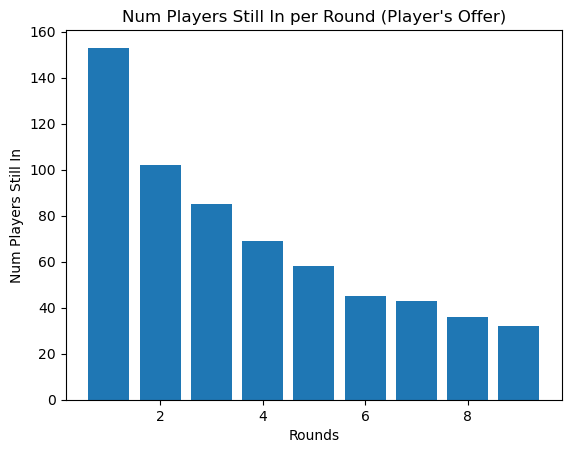

In [48]:
import numpy as np
plt.bar(np.arange(1,10), pos.count())
plt.xlabel('Rounds')
plt.ylabel('Num Players Still In')
plt.title("Num Players Still In per Round (Player's Offer)")
plt.show()
# change to pct

### Banker's Offers

Isolate banker offers from df that only has people who played BO first. Do the same for those who played BO second. Rename columns for easier merging

In [49]:
bos1 = b1data[["bo" + str(i) + "_g1" for i in range(1,10)]]
bos1.columns = [i+1 for i in range(9)]
bos2 = b2data[["bo" + str(i) + "_g2" for i in range(1,10)]]
bos2.columns = [i+1 for i in range(9)]

In [50]:
bos = pd.concat([bos1,bos2])
bos.head()

,1,2,3,4,5,6,7,8,9
1,25571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29649,58587.0,84690.0,143811.0,226729.0,295777.0,175527.0,NaN,NaN
4,38341,66560.0,81743.0,NaN,NaN,NaN,NaN,NaN,NaN
5,23224,44178.0,83981.0,148593.0,218414.0,251704.0,228798.0,331302.0,71.0


In [51]:
bodescr = pd.concat([bos[i].dropna().describe().apply(lambda x: format(x, '.1f')) for i in range(1,10)], axis=1)
bodescr

,1,2,3,4,5,6,7,8,9
count,151.0,103.0,90.0,71.0,60.0,50.0,43.0,36.0,28.0
mean,30751.8,49411.6,68645.0,94574.2,106628.7,111194.1,107259.8,134593.7,106495.8
std,6346.1,16463.7,30002.4,52574.0,79034.3,98451.7,118390.1,159908.8,169852.7
min,13856.0,5942.0,2685.0,2678.0,853.0,1113.0,189.0,142.0,5.0
25%,27028.5,38216.5,45595.5,47391.5,42886.5,34787.0,17653.0,15791.8,2290.0
50%,31119.0,49896.0,73614.0,106248.0,83263.5,85595.0,54465.0,60583.0,24939.0
75%,35448.5,61020.0,86440.5,139322.5,174115.0,181157.2,173902.0,249858.2,110829.8
max,40123.0,80737.0,138969.0,215511.0,308624.0,400967.0,499686.0,560462.0,592513.0


### Compare round retention

Plot the number of non NaN entries in each round for both the banker and player offers. If not NaN, an offer was made/calculated that round, which means they reached that round.

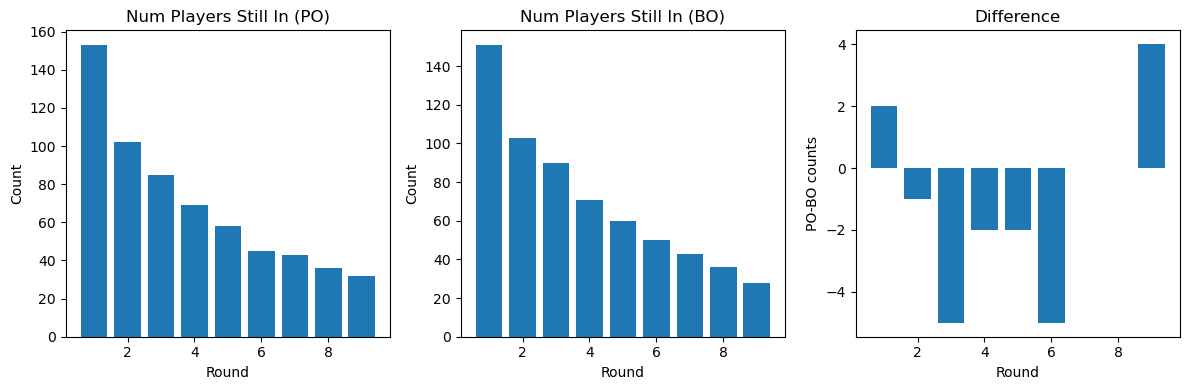

In [52]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].bar(np.arange(1,10), pos.count())
ax[0].set_title("Num Players Still In (PO)")
ax[0].set_xlabel("Round")
ax[0].set_ylabel("Count")
ax[1].bar(np.arange(1,10), bos.count())
ax[1].set_title("Num Players Still In (BO)")
ax[1].set_xlabel("Round")
ax[1].set_ylabel("Count")
ax[2].bar(np.arange(1,10), pos.count() - bos.count())
ax[2].set_title("Difference")
ax[2].set_xlabel("Round")
ax[2].set_ylabel("PO-BO counts")

plt.tight_layout()
plt.show()

### Participants

Text(0.5, 1.0, 'Gender count')

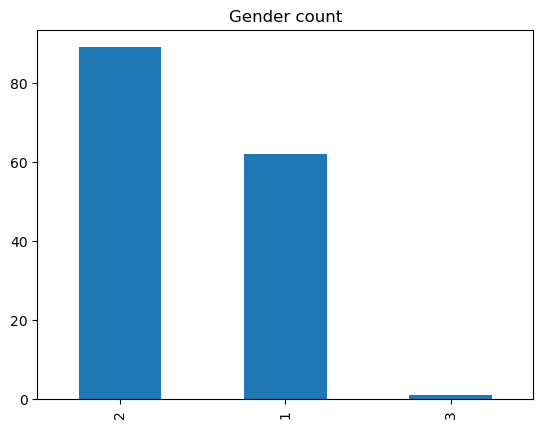

In [53]:
df['Q3'].value_counts().plot(kind='bar')
plt.title('Gender count')

Text(0.5, 1.0, 'Age')

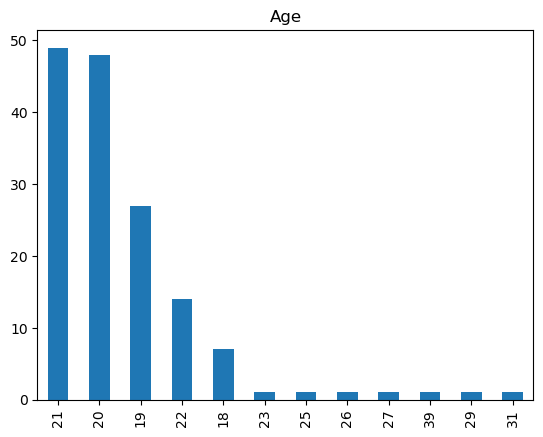

In [54]:
df['Q1'].value_counts().plot(kind='bar')
plt.title("Age")

### Round Retention

Get those who quit after the first round

In [55]:
quit = df[df['bo2_g1'].isnull() | df['bo2_g2'].isnull()]
quit[['bo1_g1', 'bo2_g1', 'bo1_g2', 'bo2_g2']].head()

,bo1_g1,bo2_g1,bo1_g2,bo2_g2
0,24962,NaN,22043,NaN
1,25571,NaN,31270,49392.0
2,19700,NaN,37815,NaN
5,23224,44178.0,37759,NaN
6,38970,NaN,34204,55269.0


Number of people who quit in either the first or second game

In [63]:
len(quit.index)

69

Number of people who quit in both the first and second game

In [64]:
quitboth = df[(df['end_round_g1']==1) & (df['end_round_g2']==1)]
quitboth[['bo1_g1', 'bo2_g1', 'bo1_g2', 'bo2_g2']].head(2)

,bo1_g1,bo2_g1,bo1_g2,bo2_g2
0,24962,NaN,22043,NaN
2,19700,NaN,37815,NaN


In [65]:
quitboth.shape

(30, 110)

### Retention Matrix

**G1 vs. G2**

Use groupby function to count the number of each combination

In [66]:
tuple_counts = df.groupby(['end_round_g1', 'end_round_g2']).size().reset_index(name='count')
tuple_counts = tuple_counts.fillna(0)
tuple_counts

,end_round_g1,end_round_g2,count
0,1,1,30
1,1,2,6
2,1,3,5
3,1,4,2
4,1,5,3
...,...,...,...
56,10,5,2
57,10,6,1
58,10,7,2
59,10,8,2


Plot it using sns

In [67]:
heatmap_data = tuple_counts.pivot(index='end_round_g1', columns='end_round_g2', values='count')
heatmap_data.fillna(0)
heatmap_data

end_round_g2,1,2,3,4,5,6,7,8,9,10
end_round_g1,,,,,,,,,,
1,30.0,6.0,5.0,2.0,3.0,2.0,1.0,NaN,NaN,3.0
2,4.0,3.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,3.0,5.0,NaN,2.0,3.0,NaN,NaN,1.0,NaN,2.0
4,2.0,1.0,3.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0
5,NaN,NaN,3.0,1.0,NaN,1.0,1.0,1.0,3.0,4.0
6,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
7,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0
8,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,2.0
9,3.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


**BO vs. PO**

Isolate games with BO first and create tuple

In [68]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer
b1data = b1data[['end_round_g1', 'end_round_g2']]
b1data = b1data.rename(columns={'end_round_g1': 'BO_end_round',
                               'end_round_g2': 'PO_end_round'})
b1data.head()

,BO_end_round,PO_end_round
1,1,10
2,1,1
3,7,10
4,3,5
5,9,1


Isolate games with BO 2nd game and create tupl in same order as first

In [69]:
b2data = df[df['po1_g2'].isnull()] # game 2 was Banker's Offer
b2data = b2data[['end_round_g1', 'end_round_g2']]
b2data = b2data.rename(columns= {'end_round_g1': 'PO_end_round',
                                'end_round_g2': 'BO_end_round'})
b2data.head()

,PO_end_round,BO_end_round
0,1,1
6,1,3
9,4,2
11,3,1
14,7,4


In [70]:
comb_v = pd.concat([b1data, b2data])
comb_v.shape

(151, 2)

In [71]:
vtuple_counts = comb_v.groupby(['BO_end_round', 'PO_end_round']).size().reset_index(name='count')
vtuple_counts = vtuple_counts.fillna(0)
vtuple_counts

,BO_end_round,PO_end_round,count
0,1,1,30
1,1,2,8
2,1,3,3
3,1,4,2
4,1,5,1
5,1,9,1
6,1,10,3
7,2,1,2
8,2,2,3
9,2,3,5


In [72]:
vheatmap_data = vtuple_counts.pivot(index='BO_end_round', columns='PO_end_round', values='count')
vheatmap_data.fillna(0)
vheatmap_data

PO_end_round,1,2,3,4,5,6,7,8,9,10
BO_end_round,,,,,,,,,,
1,30.0,8.0,3.0,2.0,1.0,NaN,NaN,NaN,1.0,3.0
2,2.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
3,5.0,4.0,NaN,3.0,3.0,NaN,NaN,1.0,NaN,3.0
4,2.0,NaN,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN
5,2.0,NaN,3.0,NaN,NaN,1.0,NaN,1.0,1.0,2.0
6,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0
7,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,2.0
8,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,4.0
9,2.0,1.0,1.0,1.0,2.0,NaN,2.0,1.0,NaN,NaN


- BO_end_round-PO_end_round

### BO vs. PO Winnings

In [73]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer
b1data = b1data[['winnings_g1_log10', 'winnings_g2_log10']]
b1data = b1data.rename(columns={'winnings_g1_log10': 'BO_winnings_log10',
                               'winnings_g2_log10': 'PO_winnings_log10'})
b2data = df[df['po1_g2'].isnull()] # game 2 was Banker's Offer
b2data = b2data[['winnings_g1_log10', 'winnings_g2_log10']]
b2data = b2data.rename(columns={'winnings_g1_log10': 'PO_winnings_log10',
                               'winnings_g2_log10': 'BO_winnings_log10'})
comb_w = pd.concat([b1data, b2data])
comb_w.shape

(151, 2)

Text(0.5, 1.0, "Banker's vs Player's Offer Winnings")

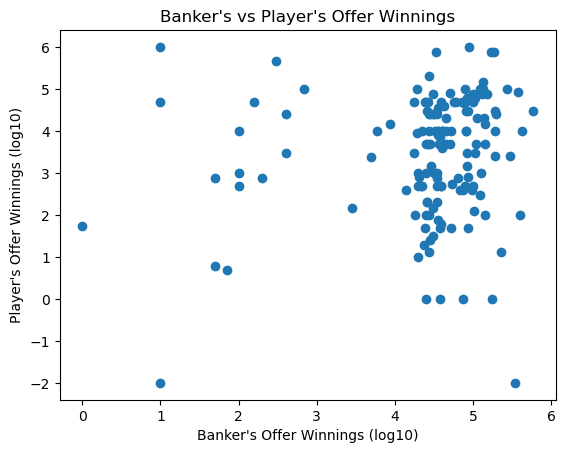

In [74]:
plt.scatter(comb_w['BO_winnings_log10'], comb_w['PO_winnings_log10'])
plt.xlabel('Banker\'s Offer Winnings (log10)')
plt.ylabel('Player\'s Offer Winnings (log10)')
plt.title('Banker\'s vs Player\'s Offer Winnings')

### Describe Winnings by Round

**Banker's Offer Version**

In [75]:
wbdescr = {}

Combine into df regardless of order and which contains only Banker's Offer stats

In [84]:
b1data = df[df['po1_g1'].isnull()] # game 1 was Banker's Offer
b1data = b1data[['winnings_g1', 'end_round_g1']]
b1data = b1data.rename(columns={'winnings_g1': 'winnings',
                               'end_round_g1': 'end_round'})
b2data = df[df['po1_g2'].isnull()] # game 2 was Banker's Offer
b2data = b2data[['winnings_g2', 'end_round_g2']]
b2data = b2data.rename(columns={'winnings_g2': 'winnings',
                               'end_round_g2': 'end_round'})
comb_b = pd.concat([b1data, b2data])
#comb_b.head()
comb_b.shape

(151, 2)

Loop through rounds to calculate descriptive stats

In [86]:
for i in range(1,10):
    wbdf = comb_b[comb_b['end_round']==i] # filter for the games that ended that round
    wbdescr[str(i)] = wbdf['winnings'].dropna().describe().apply(lambda x: format(x, '.1f'))
pd.DataFrame(wbdescr)

,1,2,3,4,5,6,7,8,9
count,48.0,13.0,19.0,11.0,10.0,7.0,7.0,8.0,10.0
mean,29903.4,45836.2,63203.9,115919.4,130962.1,164489.7,84160.9,148554.1,156188.9
std,6944.7,16660.6,26134.0,25077.2,61773.1,100279.7,76578.1,156919.5,218513.2
min,17377.0,21590.0,14118.0,78814.0,28151.0,39262.0,6003.0,8728.0,71.0
25%,24956.2,27790.0,44034.0,101740.0,88450.2,85637.0,21065.5,31796.5,1220.0
50%,29946.5,50253.0,71667.0,112291.0,131140.5,169308.0,54465.0,104604.5,35929.5
75%,35900.5,56656.0,82330.0,137524.5,180398.8,235019.0,151013.5,187183.0,311294.2
max,40080.0,74497.0,105580.0,150679.0,229853.0,301546.0,184500.0,429624.0,592513.0


**Player's Offer Version**

In [81]:
wpdescr = {}

Combine into df regardless of order and which contains only Banker's Offer stats

In [87]:
p1data = df[df['po1_g1'].notnull()] # game 1 was Player's Offer
p1data = p1data[['winnings_g1', 'end_round_g1']]
p1data = p1data.rename(columns={'winnings_g1': 'winnings',
                               'end_round_g1': 'end_round'})
p2data = df[df['po1_g2'].notnull()] # game 2 was Player's Offer
p2data = p2data[['winnings_g2', 'end_round_g2']]
p2data = p2data.rename(columns={'winnings_g2': 'winnings',
                               'end_round_g2': 'end_round'})
comb_p = pd.concat([p1data, p2data])
#comb_p.head()
comb_b.shape

(151, 2)

Loop through rounds to calculate descriptive stats

In [88]:
for i in range(1,10):
    wpdf = comb_p[comb_p['end_round']==i] # filter for the games that ended that round
    wpdescr[str(i)] = wpdf['winnings'].dropna().describe().apply(lambda x: format(x, '.1f'))
pd.DataFrame(wpdescr)

,1,2,3,4,5,6,7,8,9
count,51.0,17.0,16.0,11.0,13.0,2.0,7.0,4.0,7.0
mean,4953.3,19313.4,28766.0,47272.7,38531.1,17500.0,81107.1,28775.0,33693.7
std,7938.2,21880.1,30848.9,37960.7,39252.8,3535.5,174610.4,24583.2,54434.3
min,1.0,1.0,32.0,1000.0,50.0,15000.0,100.0,100.0,6.0
25%,111.5,1500.0,2125.0,15000.0,3000.0,16250.0,1325.0,18775.0,425.0
50%,500.0,10000.0,20000.0,50000.0,25000.0,17500.0,15000.0,27500.0,10000.0
75%,7885.0,40000.0,50000.0,80000.0,75000.0,18750.0,37500.0,37500.0,37500.0
max,30000.0,60000.0,100000.0,100000.0,100000.0,20000.0,475000.0,60000.0,150000.0


### BO-PO difference

In [89]:
b1data = df[df['po1_g1'].isnull()].copy()  # BO first
b1data['windiff'] = b1data['winnings_g1'] - b1data['winnings_g2']

b2data = df[df['po1_g2'].isnull()].copy()  # BO second
b2data['windiff'] = b2data['winnings_g2'] - b2data['winnings_g1']

diff = pd.concat([b1data['windiff'], b2data['windiff']])


In [90]:
diff.describe() # BANKER-PLAYER

count       151.000000
mean      20323.410464
std      177368.922061
min     -999990.000000
25%        2782.000000
50%       27301.000000
75%       55492.500000
max      562513.000000
Name: windiff, dtype: float64

### End Round vs Offer

In [91]:
g1 = df[['end_round_g1', 'winnings_g1']]
g1 = g1.rename(columns={'end_round_g1': 'end_round',
                   'winnings_g1': 'winnings'})
g2 = df[['end_round_g2', 'winnings_g2']]
g2 = g2.rename(columns={'end_round_g2': 'end_round',
                   'winnings_g2': 'winnings'})
g12 = pd.concat([g1, g2])
g12.head()

,end_round,winnings
0,1,500.0
1,1,25571.0
2,1,19700.0
3,7,175527.0
4,3,81743.0


In [92]:
g12.shape

(304, 2)

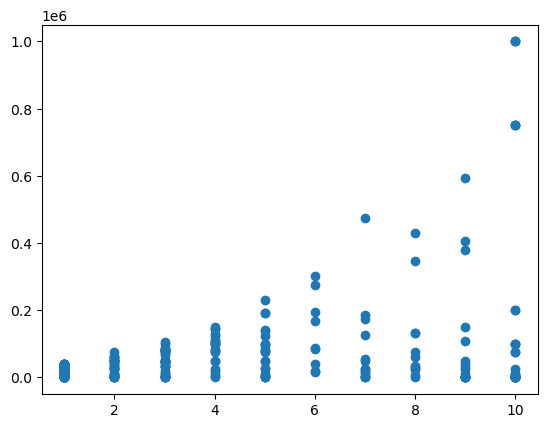

In [76]:
plt.scatter(g12['end_round'], g12['winnings'])

In [77]:
amoutn won in bo-po - descriptive stats table 
ratio over time (player's offer vs banker's offer)
possible regression for po? filter out early quitters or outrageously high

SyntaxError: invalid syntax (3039972065.py, line 1)

## PO/BO over rounds

In [94]:
## ratio over time
b1data = df[df['po1_g1'].isnull()].copy() # game 1 was Banker's Offer
for i in range(1,10):
    b1data['(po/bo)_r' + str(i)] = 0
for index, row in b1data.iterrows(): # ALL g2
    for i in range(1,10):
        if not math.isnan(row['bo' + str(i) + '_g2']):
            b1data.loc[index, '(po/bo)_r' + str(i)] = (row['po' + str(i) + '_g2']) / (row['bo' + str(i) + '_g2'])
    

b2data = df[df['po1_g2'].isnull()].copy() # game 2 was Banker's Offer
for i in range(1,10):
    b2data['(po/bo)_r' + str(i)] = 0
for index, row in b2data.iterrows():
    for i in range(1,10):
        if not math.isnan(row['bo' + str(i) + '_g1']):
            b1data.loc[index, '(po/bo)_r' + str(i)] = (row['po' + str(i) + '_g1']) / (row['bo' + str(i) + '_g1'])

In [95]:
comb_ratios = pd.concat([b1data, b2data])
comb_ratios.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,winnings_g2_log10,(po/bo)_r1,(po/bo)_r2,(po/bo)_r3,(po/bo)_r4,(po/bo)_r5,(po/bo)_r6,(po/bo)_r7,(po/bo)_r8,(po/bo)_r9
1,11/13/2023 0:34,11/13/2023 0:55,0,47.154.19.234,100,1262,1,11/13/2023 0:55,R_3QMLlo4DfKrKlq1,NaN,...,2.301030,3.197953,1.619695,0.830179,0.790670,0.627873,0.419050,0.925483,1.103956,1.021450
2,11/13/2023 11:44,11/13/2023 11:59,0,207.151.52.217,100,859,1,11/13/2023 11:59,R_pJWmZqiXedP9AYx,NaN,...,1.000000,0.000264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11/13/2023 11:48,11/13/2023 11:59,0,207.151.52.65,100,683,1,11/13/2023 11:59,R_1N2D7lm6UfgU5j0,NaN,...,0.000000,1.911753,0.954326,2.067112,1.335815,1.129707,0.915432,1.092366,0.905182,0.741962
4,11/13/2023 12:39,11/13/2023 12:46,0,104.32.181.17,100,454,1,11/13/2023 12:46,R_246mV4u7mFX08gQ,NaN,...,4.000000,5.477351,3.988831,20.890347,2.267985,0.228566,0.000000,0.000000,0.000000,0.000000
5,11/13/2023 13:43,11/13/2023 13:47,0,207.151.52.81,100,253,1,11/13/2023 13:47,R_1ffSiDx1nBT7Y2k,NaN,...,0.698970,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,11/13/2023 15:38,11/13/2023 15:48,0,207.151.52.66,100,592,1,11/13/2023 15:48,R_9Y32PzkQxeAZ4DD,NaN,...,4.000000,2.046664,0.136264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,11/13/2023 16:43,11/13/2023 17:35,0,172.117.177.144,100,3122,1,11/13/2023 17:35,R_2TYiRQoDneYUAQ3,NaN,...,2.698970,0.012826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,11/13/2023 19:42,11/13/2023 19:55,0,207.151.52.5,100,768,1,11/13/2023 19:55,R_2w7uDdluNnDITN5,NaN,...,5.875061,24.798307,12.350253,5.573515,4.706325,1.989911,0.762951,0.842896,0.388131,0.477590
12,11/14/2023 0:55,11/14/2023 1:08,0,104.32.160.15,100,828,1,11/14/2023 1:08,R_1DAVYdGcl6XD0yJ,NaN,...,3.000000,12.676842,7.131447,2.694401,5.545881,2.110254,1.618158,2.100576,1.468429,1.167883
13,11/14/2023 0:44,11/14/2023 1:09,0,76.175.119.124,100,1483,1,11/14/2023 1:09,R_25GVqAFj04fhR5V,NaN,...,4.176091,4.079254,4.936139,1.616919,1.138822,0.554331,0.159427,0.000000,0.000000,0.000000


In [96]:
ratio_medians = []
for i in range(1,10):
    ratio_medians.append(comb_ratios[comb_ratios['(po/bo)_r' + str(i)]!=0]['(po/bo)_r' + str(i)].median())
ratio_medians

[2.080559254327563,
 2.2045581883553433,
 1.6620820902344366,
 1.6042351808775166,
 1.0442584456918618,
 1.618157889059095,
 1.4092129851828403,
 1.496272395178565,
 1.1666921885899988]

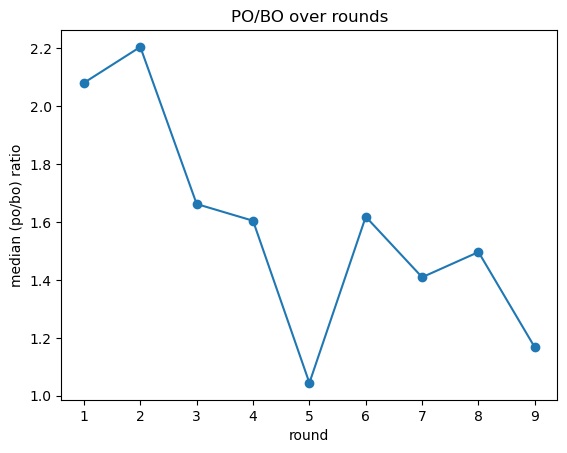

In [97]:
# Create a range from 1 to 9
x_values = list(range(1, 10))

# Plot the values
plt.plot(x_values, ratio_medians, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('round')
plt.ylabel('median (po/bo) ratio')
plt.title('PO/BO over rounds')

# Show the plot
plt.show()